In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
income_data = pd.read_csv('MLDataFull.csv')
income_data.head()

,Year,MI,FI
0,2017,58927,37537
1,2016,57147,36157
2,2015,54757,34453
3,2014,53196,32588
4,2013,50779,31968


In [3]:
male_1967_2007 = income_data.loc[income_data["Year"] <= 2007, ["Year", "MI"]]
male_1967_2007.head()

,Year,MI
10,2007,47137
11,2006,46677
12,2005,44850
13,2004,42831
14,2003,41483


In [4]:
male_1967_2017 = income_data.loc[income_data["Year"] <= 2017, ["Year", "MI"]]
male_1967_2017.head()

,Year,MI
0,2017,58927
1,2016,57147
2,2015,54757
3,2014,53196
4,2013,50779


In [5]:
male_2007_2017 = income_data.loc[income_data["Year"] >= 2007, ["Year", "MI"]]
male_2007_2017.head(20)

,Year,MI
0,2017,58927
1,2016,57147
2,2015,54757
3,2014,53196
4,2013,50779
5,2012,49915
6,2011,48948
7,2010,47077
8,2009,46800
9,2008,47751


## First Model
* Fit the male model using 1967 to 2007 data;
* Predict the income from 2007 to 2017 and check how accurate the model was;
* Predict the income for the next 10 years (2017 to 2027).

In [6]:
# Assign the data to X and y (1967 to 2007)
X_male = male_1967_2007["Year"].values.reshape(-1,1)
y_male = male_1967_2007["MI"].values.reshape(-1, 1)
print(X_male.shape, y_male.shape)

(41, 1) (41, 1)


In [7]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression

model_male = LinearRegression()
model_male.fit(X_male, y_male)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model_male.coef_)
print('y-axis intercept: ', model_male.intercept_)

Weight coefficients:  [[1074.40069686]]
y-axis intercept:  [-2110847.5261324]


In [9]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`
x_male_min = np.array([[X_male.min()]])
x_male_max = np.array([[X_male.max()]])
print(f"Min Male X Value: {x_male_min}")
print(f"Max Male X Value: {x_male_max}")

Min Male X Value: [[1967]]
Max Male X Value: [[2007]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_male_min = model_male.predict(x_male_min)
y_male_max = model_male.predict(x_male_max)

In [11]:
print(y_male_min, y_male_max)

[[2498.6445993]] [[45474.67247387]]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model_male.predict(X_male)

# Score the prediction with mse and r2
mse = mean_squared_error(y_male, predicted)
r2 = r2_score(y_male, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2250804.2833346864
R-squared (R2 ): 0.9862636870130662


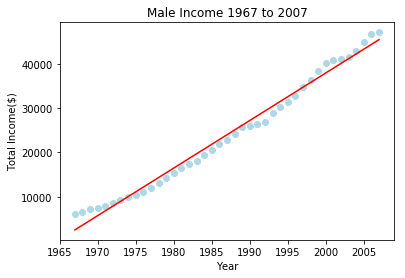

In [13]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X_male, y_male, c='lightblue')
plt.plot([x_male_min[0], x_male_max[0]], [y_male_min[0], y_male_max[0]], c='red')

plt.title("Male Income 1967 to 2007")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Male Income 1967_2007")

In [14]:
# Use the completed file to test 
# Assign the data to X and y (2007 to 2017)
X_male_full = male_2007_2017["Year"].values.reshape(-1,1)
y_male_full = male_2007_2017["MI"].values.reshape(-1, 1)
print(X_male_full.shape, y_male_full.shape)

(11, 1) (11, 1)


In [15]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`
x_male_full_min = np.array([[X_male_full.min()]])
x_male_full_max = np.array([[X_male_full.max()]])
print(f"Min Male X Value: {x_male_full_min}")
print(f"Max Male X Value: {x_male_full_max}")

Min Male X Value: [[2007]]
Max Male X Value: [[2017]]


In [16]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_male_full_min = model_male.predict(x_male_full_min)
y_male_full_max = model_male.predict(x_male_full_max)

In [17]:
print(y_male_full_min, y_male_full_max)

[[45474.67247387]] [[56218.67944251]]


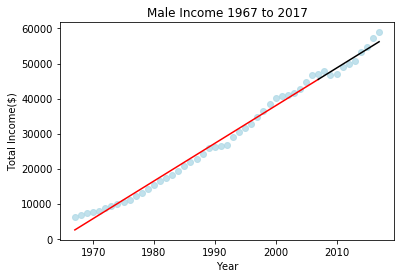

In [18]:
#Male income over time
plt.scatter(male_1967_2017["Year"],male_1967_2017["MI"], alpha = 0.75, color="lightblue")

plt.plot([x_male_min[0], x_male_max[0]], [y_male_min[0], y_male_max[0]], c='red')
plt.plot([x_male_full_min[0], x_male_full_max[0]], [y_male_full_min[0], y_male_full_max[0]], c='black')

plt.title("Male Income 1967 to 2017")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Male Income 1967_2017")
plt.show()

In [19]:
# Plot the Residuals for the 2007 to 2017 actual and predicted data
# plt.scatter(male_2007_2017["Year"],male_2007_2017["MI"] - y_male, c="blue", label="Training Data")
# plt.scatter(model_male.predict(X_male), model_male.predict(X_male) - y_male, c="orange", label="Testing Data")
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")

In [20]:
x_male_fut_min = np.array([[2017]])
x_male_fut_max = np.array([[2027]])
print(f"Min Male X Value: {x_male_fut_min}")
print(f"Max Male X Value: {x_male_fut_max}")

Min Male X Value: [[2017]]
Max Male X Value: [[2027]]


In [21]:
y_male_fut_min = model_male.predict(x_male_fut_min)
y_male_fut_max = model_male.predict(x_male_fut_max)
print(y_male_fut_min, y_male_fut_max)

[[56218.67944251]] [[66962.68641115]]


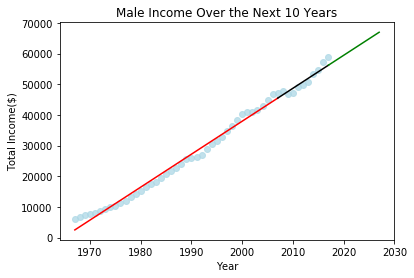

In [22]:
#Male income over the next 10 years
plt.scatter(male_1967_2017["Year"],male_1967_2017["MI"], alpha = 0.75, color="lightblue")

plt.plot([x_male_min[0], x_male_max[0]], [y_male_min[0], y_male_max[0]], c='red')
plt.plot([x_male_full_min[0], x_male_full_max[0]], [y_male_full_min[0], y_male_full_max[0]], c='black')
plt.plot([x_male_fut_min[0], x_male_fut_max[0]], [y_male_fut_min[0], y_male_fut_max[0]], c='green')

plt.title("Male Income Over the Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Future Male Income")
plt.show()

## Second Model
* Fit the male model using 1967 to 2017 data;
* Predict the income for the next 10 years (2017 to 2027);
* Compare the predictions between first and second model.

In [23]:
# Assign the data to X and y (1967 to 2007)
X_male = male_1967_2017["Year"].values.reshape(-1,1)
y_male = male_1967_2017["MI"].values.reshape(-1, 1)
print(X_male.shape, y_male.shape)

(51, 1) (51, 1)


In [24]:
model_male = LinearRegression()
model_male.fit(X_male, y_male)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
x_male_min = np.array([[X_male.min()]])
x_male_max = np.array([[X_male.max()]])
print(f"Min Male X Value: {x_male_min}")
print(f"Max Male X Value: {x_male_max}")

Min Male X Value: [[1967]]
Max Male X Value: [[2017]]


In [26]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_male_min = model_male.predict(x_male_min)
y_male_max = model_male.predict(x_male_max)

In [27]:
print(y_male_min, y_male_max)

[[2405.59426848]] [[56368.91553544]]


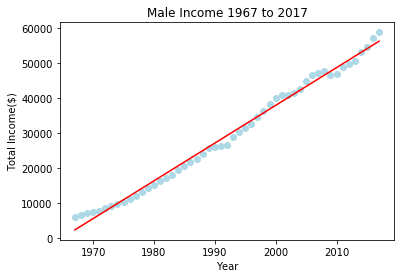

In [28]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X_male, y_male, c='lightblue')
plt.plot([x_male_min[0], x_male_max[0]], [y_male_min[0], y_male_max[0]], c='red')

plt.title("Male Income 1967 to 2017")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Male Income 1967_2017_2")

In [29]:
x_male_fut_min_2 = np.array([[2017]])
x_male_fut_max_2 = np.array([[2027]])
print(f"Min Male X Value: {x_male_fut_min}")
print(f"Max Male X Value: {x_male_fut_max}")

Min Male X Value: [[2017]]
Max Male X Value: [[2027]]


In [30]:
y_male_fut_min_2 = model_male.predict(x_male_fut_min_2)
y_male_fut_max_2 = model_male.predict(x_male_fut_max_2)
print(y_male_fut_min_2, y_male_fut_max_2)

[[56368.91553544]] [[67161.57978884]]


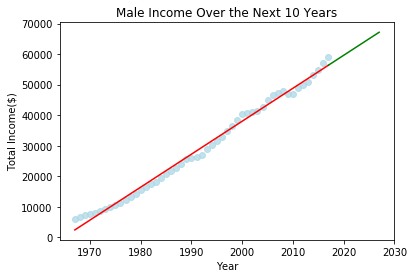

In [31]:
#Male income over the next 10 years
plt.scatter(male_1967_2017["Year"],male_1967_2017["MI"], alpha = 0.75, color="lightblue")

plt.plot([x_male_min[0], x_male_max[0]], [y_male_min[0], y_male_max[0]], c='red')
plt.plot([x_male_fut_min_2[0], x_male_fut_max_2[0]], [y_male_fut_min_2[0], y_male_fut_max_2[0]], c='green')

plt.title("Male Income Over the Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Future Male Income_2")
plt.show()

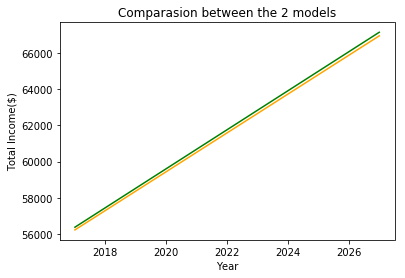

In [32]:
plt.plot([x_male_fut_min[0], x_male_fut_max[0]], [y_male_fut_min[0], y_male_fut_max[0]], c='orange')
plt.plot([x_male_fut_min_2[0], x_male_fut_max_2[0]], [y_male_fut_min_2[0], y_male_fut_max_2[0]], c='green')

plt.title("Comparasion between the 2 models")
plt.xlabel("Year")
plt.ylabel("Total Income($)")
plt.savefig("Comparasion_Male")
plt.show()